In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Historical Product Demand.csv')

In [4]:
data.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500

In [5]:
data.shape

(1048575, 5)

In [6]:
data.Date = pd.to_datetime(data.Date)
data.Date.min(), data.Date.max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [7]:
data.describe()

Product_Code Warehouse Product_Category                 Date  \
count        1048575   1048575          1048575              1037336   
unique          2160         4               33                 1729   
top     Product_1359    Whse_J     Category_019  2013-09-27 00:00:00   
freq           16936    764447           481099                 2075   
first            NaN       NaN              NaN  2011-01-08 00:00:00   
last             NaN       NaN              NaN  2017-01-09 00:00:00   

       Order_Demand  
count       1048575  
unique         3828  
top           1000   
freq         112682  
first           NaN  
last            NaN

In [8]:
data.Order_Demand = data.Order_Demand.str.replace('(', '')
data.Order_Demand = data.Order_Demand.str.replace(')', '')

In [9]:
data.Order_Demand = data.Order_Demand.astype(float)

In [10]:
data.describe()

Order_Demand
count  1.048575e+06
mean   4.906977e+03
std    2.892678e+04
min    0.000000e+00
25%    2.000000e+01
50%    3.000000e+02
75%    2.000000e+03
max    4.000000e+06

In [11]:
data[['Product_Code', 'Warehouse', 'Product_Category']].describe()

Product_Code Warehouse Product_Category
count        1048575   1048575          1048575
unique          2160         4               33
top     Product_1359    Whse_J     Category_019
freq           16936    764447           481099

In [12]:
data.isna().sum()/data.shape[0]

Product_Code        0.000000
Warehouse           0.000000
Product_Category    0.000000
Date                0.010718
Order_Demand        0.000000
dtype: float64

In [13]:
data = data[data['Date'].notnull()]
data.isna().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [14]:
data.groupby('Product_Category')['Order_Demand'].agg('sum').reset_index().sort_values(by = 'Order_Demand', ascending = False).head()

Product_Category  Order_Demand
18     Category_019  4.240159e+09
5      Category_006  4.055713e+08
4      Category_005  1.996745e+08
6      Category_007  1.286915e+08
27     Category_028  4.905535e+07

<AxesSubplot:xlabel='Product_Category'>

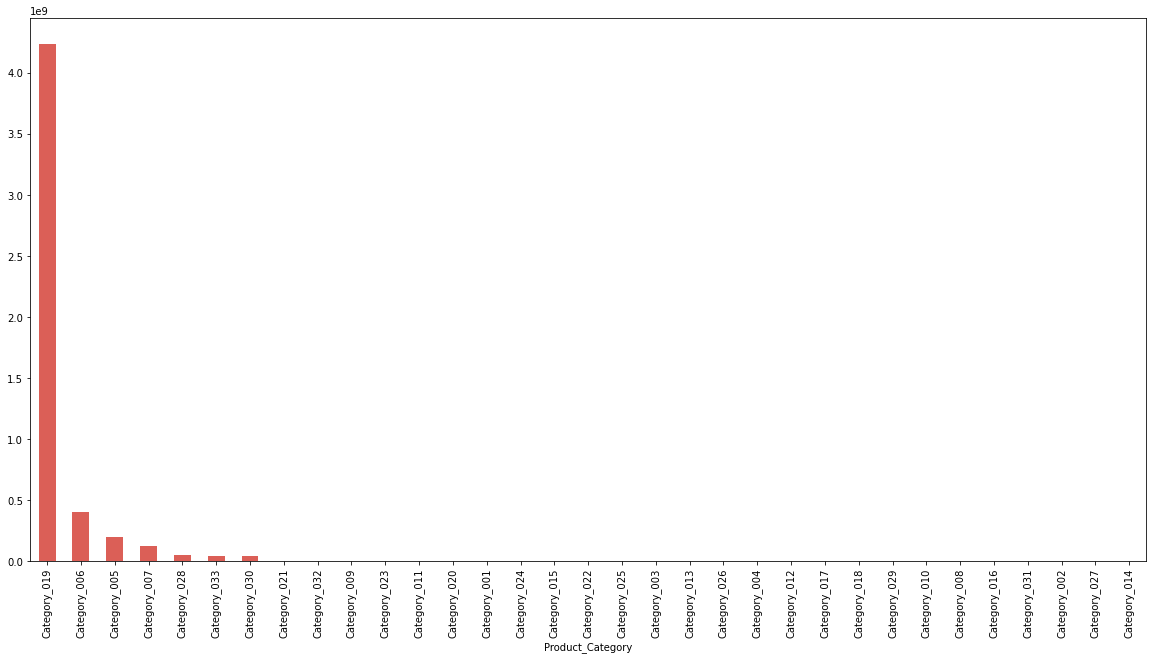

In [15]:
sns.set_palette(sns.color_palette('hls', 8))
plt.figure(figsize = (20, 10))
data.groupby('Product_Category')['Order_Demand'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')

005, 006, 007 and 019 are major product categories

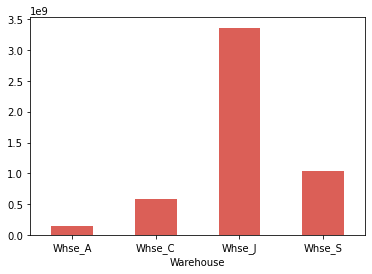

In [16]:
data.groupby('Warehouse')['Order_Demand'].agg('sum').plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Seasonality in the data

In [17]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [18]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

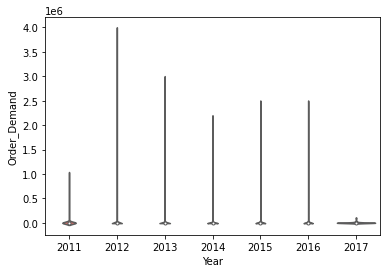

In [19]:
sns.violinplot(x = "Year", y = 'Order_Demand', data = data)
plt.show()

<AxesSubplot:xlabel='Year,Month'>

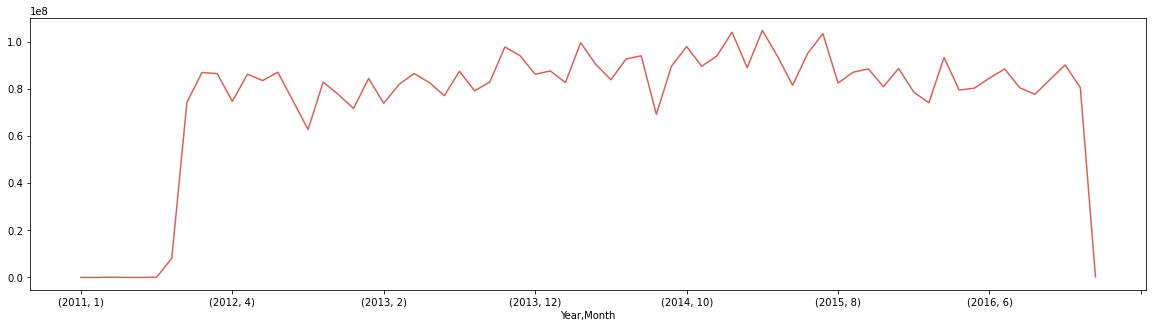

In [20]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby(['Year','Month'])['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year'>

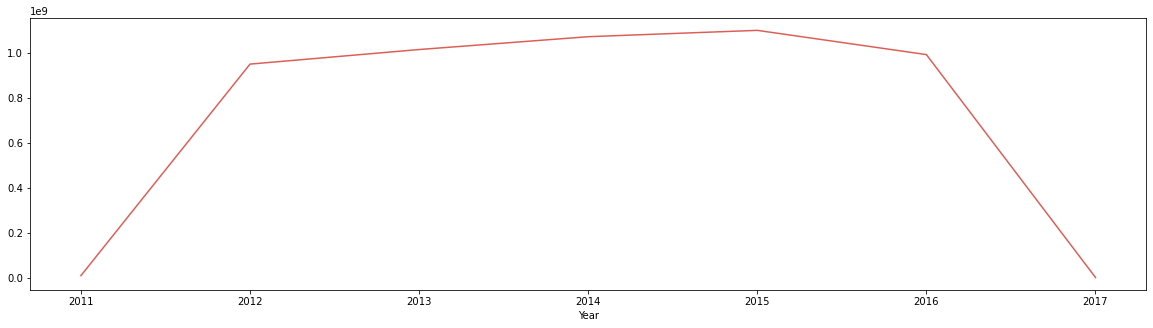

In [21]:
plt.figure(figsize = (20, 5))
#plt.ylim([0, 500000000])
data.groupby('Year')['Order_Demand'].agg('sum').plot(kind = 'line')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

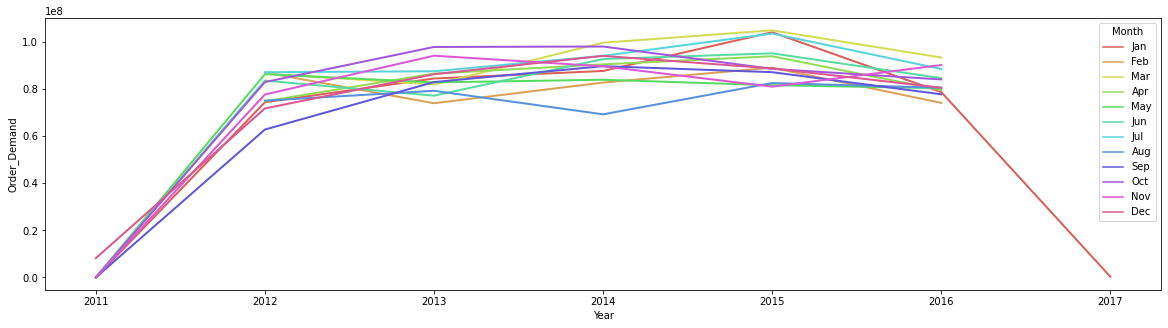

In [22]:
plt.figure(figsize = (20, 5))
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year', 'Month'], ascending = False)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 12))
sns.lineplot(data=temp, x="Year", y="Order_Demand", hue="Month", markers = True, lw = 2, hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


<AxesSubplot:xlabel='Month', ylabel='Order_Demand'>

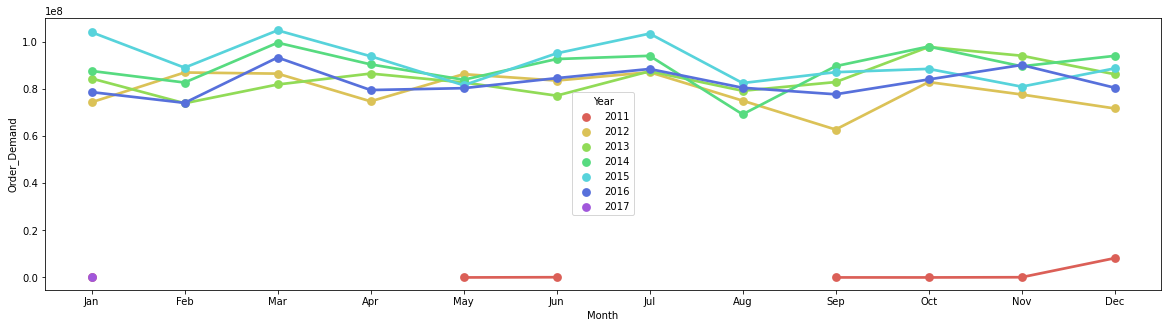

In [23]:
temp = data.groupby(['Year', 'Month'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Month'], ascending = True)
temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Month", y="Order_Demand", hue="Year")

In [24]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Order_Demand'>

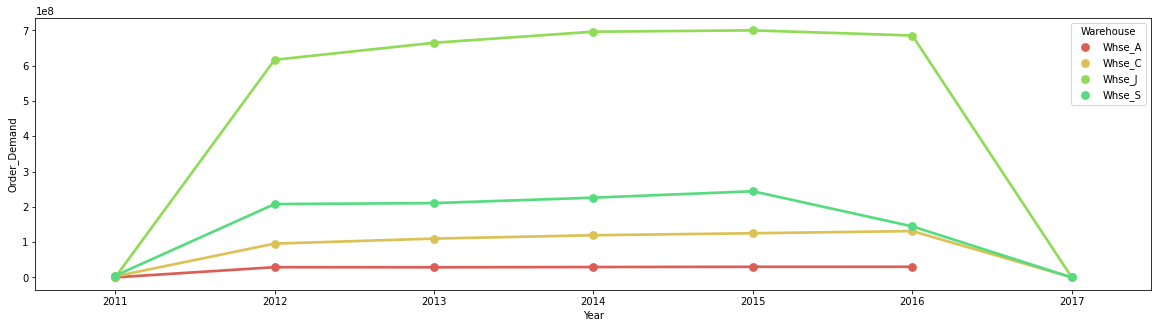

In [25]:
temp = data.groupby(['Year', 'Warehouse'])['Order_Demand'].agg('sum').reset_index().sort_values(by = ['Year'], ascending = True)
#temp.Month = temp.Month.replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
sns.set_palette(sns.color_palette('hls', 8))
temp.Year = temp.Year.astype("category")
plt.figure(figsize = (20, 5))
#sns.lineplot(data=temp, x="Month", y="Order_Demand", hue="Year", markers = True, lw = 3)
sns.pointplot(data=temp, x="Year", y="Order_Demand", hue="Warehouse")

In [26]:
#Excluding all data from 2017 and 2011 to ensure only years with complete data are reflected
full_data = data.copy()

data = data[data['Year'] != 2017]
data = data[data['Year'] != 2011]

In [27]:
data['Year'].value_counts()

2013    218298
2014    216404
2015    209661
2012    203635
2016    188645
Name: Year, dtype: int64

<AxesSubplot:xlabel='Month'>

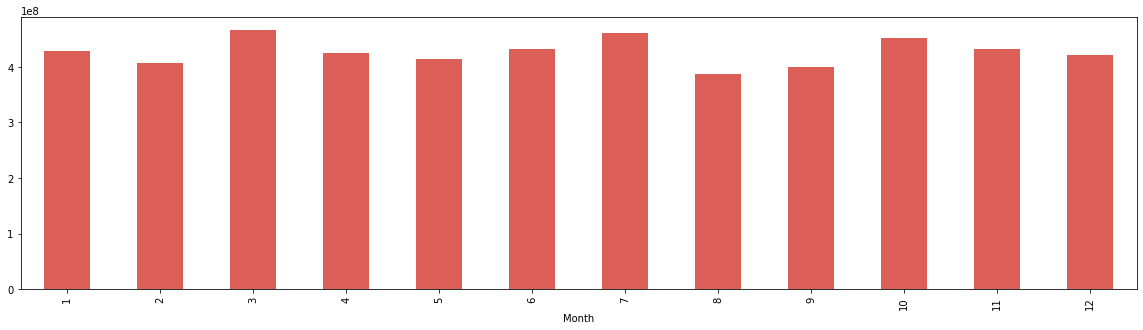

In [28]:
plt.figure(figsize = (20, 5))
data.groupby('Month')['Order_Demand'].agg('sum').plot(kind = 'bar')

In [29]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

<AxesSubplot:xlabel='Warehouse', ylabel='Order_Demand'>

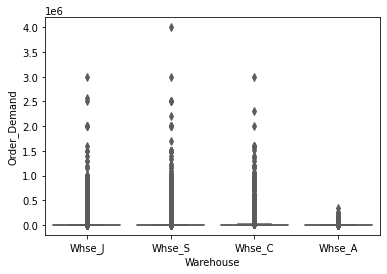

In [30]:
sns.boxplot(data = data, x = 'Warehouse', y  = 'Order_Demand')

<AxesSubplot:xlabel='Warehouse', ylabel='Log_Order_Demand'>

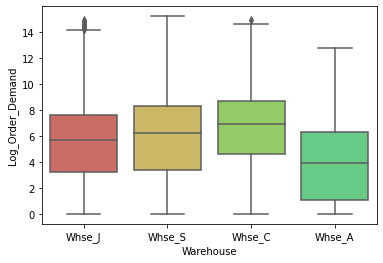

In [31]:
#Log transform of the order demand
temp = data.copy()
temp['Log_Order_Demand'] = np.log(temp['Order_Demand'])
sns.boxplot(data = temp, x = 'Warehouse', y  = 'Log_Order_Demand')

In [32]:
from statsmodels.tsa.seasonal import DecomposeResult

from statsmodels.tsa.seasonal import seasonal_decompose

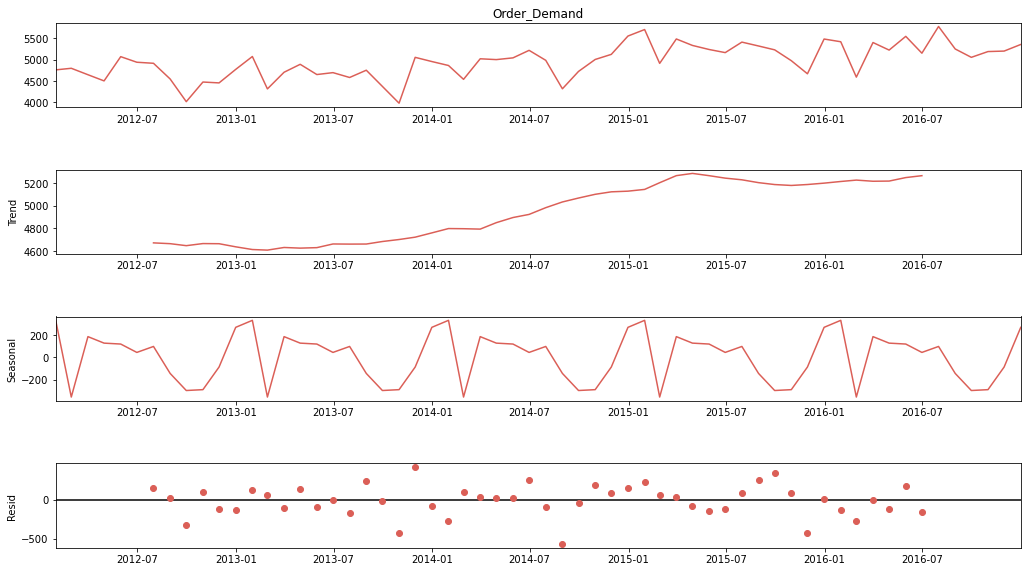

In [33]:
temp = None

month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'additive')
fig = decompose.plot()
fig.set_size_inches((16, 9))
#plt.show()

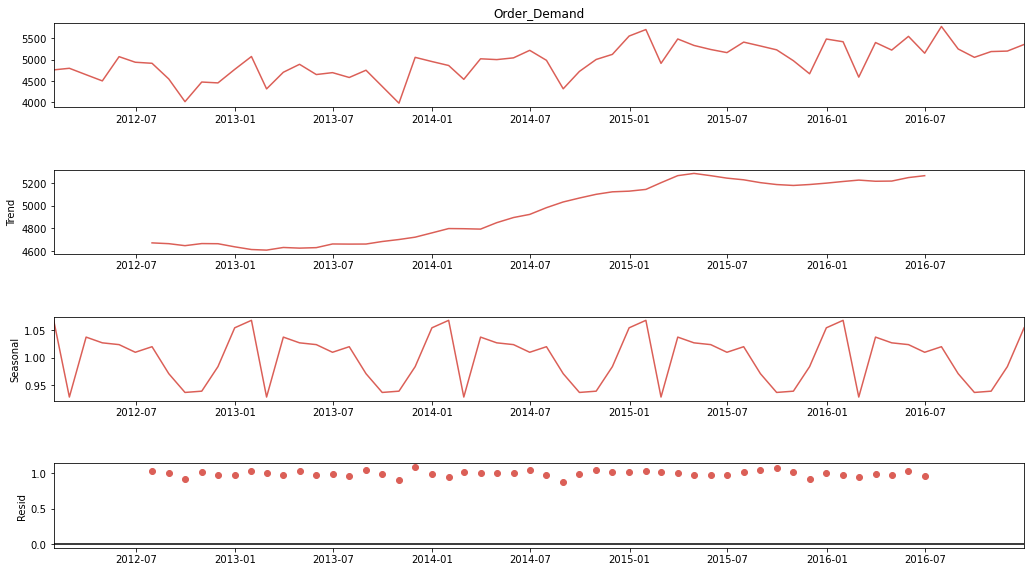

In [34]:
month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None
decompose = seasonal_decompose(month_avg_sales, model = 'multiplicative')
fig = decompose.plot()
fig.set_size_inches((16, 9))

In [35]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Year', 'Month'],
      dtype='object')

In [36]:
data[['Product_Category', 'Warehouse', 'Order_Demand']].groupby(['Product_Category', 'Warehouse']).sum().reset_index().sort_values(by = ['Order_Demand']).pivot(index = 'Product_Category', columns = 'Warehouse', values = 'Order_Demand')

Warehouse              Whse_A       Whse_C        Whse_J       Whse_S
Product_Category                                                     
Category_001           1749.0      59909.0  1.622259e+06      72530.0
Category_002              NaN          NaN           NaN        628.0
Category_003         131499.0          NaN  3.926700e+04     220476.0
Category_004              NaN          NaN           NaN      96266.0
Category_005        1124300.0   12512000.0  1.289089e+08   56444950.0
Category_006       11591923.0   33051500.0  3.185602e+08   41807193.0
Category_007        2837624.0    7162843.0  1.121454e+08    6514672.0
Category_008           1903.0        317.0  1.534800e+04          NaN
Category_009         919881.0     250931.0  4.464670e+05    2163285.0
Category_010          12610.0          NaN  4.364000e+03       5580.0
Category_011          10360.0      63983.0  1.927017e+06     890934.0
Category_012           8926.0      14776.0  1.558800e+04      30646.0
Category_013          54524.0          NaN  8.557000e+04     169117.0
Category_014              NaN          NaN           NaN        100.0
Category_015          97975.0     112167.0  4.249460e+05     199013.0
Category_016            148.0          NaN           NaN      16702.0
Category_017          47658.0          NaN  1.443000e+03        356.0
Category_018          22935.0          NaN  1.105600e+04      12025.0
Category_019      106261139.0  518973533.0  2.739344e+09  868842203.0
Category_020              NaN     483735.0           NaN    1895657.0
Category_021        1186863.0     361355.0  1.888490e+06    1035390.0
Category_022         102670.0          NaN  6.859000e+04     433685.0
Category_023          45271.0    1635070.0  4.669330e+05    1181800.0
Category_024         154544.0     212258.0  3.551230e+05     335106.0
Category_025              NaN          NaN           NaN     486000.0
Category_026          85900.0          NaN  1.343590e+05      61694.0
Category_027            103.0          NaN           NaN          NaN
Category_028       22912085.0          NaN  1.274437e+07   13282069.0
Category_029          23979.0          NaN           NaN          NaN
Category_030              NaN    5700900.0  5.349550e+05   34265200.0
Category_031           9981.0          NaN  3.041000e+03          NaN
Category_032              NaN    1408902.0  3.845720e+05    2658534.0
Category_033              NaN          NaN  4.261000e+07          NaN

### Forecasting with the data

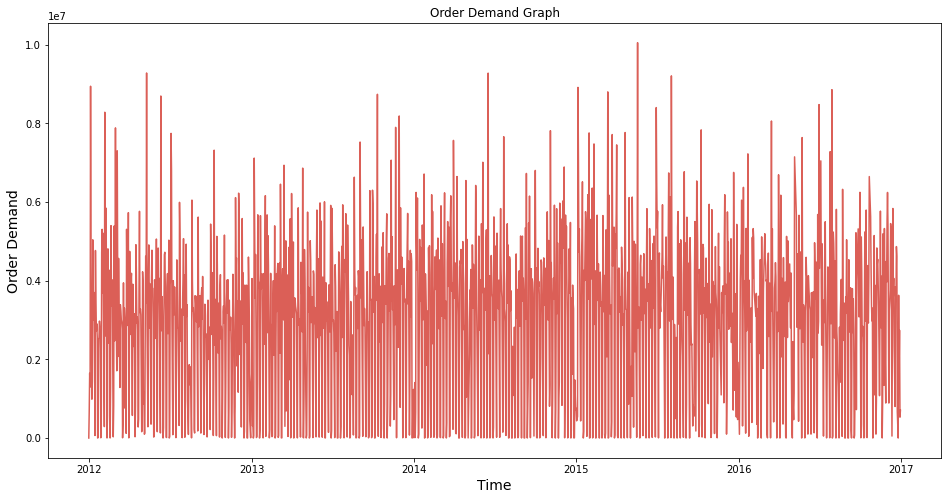

In [37]:
df = data.groupby('Date')['Order_Demand'].sum().reset_index()

plt.figure(figsize = (16, 8))
plt.title("Order Demand Graph")
plt.plot(df['Date'], df['Order_Demand'])
plt.xlabel('Time', fontsize = 14,)
plt.ylabel('Order Demand', fontsize = 14,)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math

In [39]:
order_D = df.filter(['Order_Demand']).values
train_close_len = math.ceil(len(order_D) * 0.8)
train_close_len

1345

In [40]:
scaler = MinMaxScaler()
scaled_order = scaler.fit_transform(order_D)
scaled_order

array([[1.99031453e-07],
       [6.76982600e-02],
       [1.63728946e-01],
       ...,
       [2.72703145e-01],
       [5.27917993e-02],
       [6.99545800e-02]])

In [41]:
train_len = 60

In [42]:
scaled_order.shape
train_order = scaled_order[0 : train_close_len, :]

X_train = []
y_train = []

for i in range(train_len, len(train_order)):
    X_train.append(train_order[i - train_len : i, 0])
    y_train.append(train_order[i, 0])
    
    if i <= train_len:
        print(X_train)
        print(y_train)

[array([1.99031453e-07, 6.76982600e-02, 1.63728946e-01, 1.28958549e-01,
       8.89847137e-01, 4.36947184e-01, 9.82368500e-02, 1.43570443e-01,
       5.01388891e-01, 3.30568853e-01, 2.98325061e-01, 3.68113549e-01,
       6.39388544e-03, 4.74326585e-01, 3.44696702e-01, 2.69870529e-01,
       2.89035666e-01, 2.55127374e-01, 1.99031453e-05, 1.34953277e-03,
       2.51593073e-01, 2.53474816e-01, 2.95791390e-01, 2.81800375e-01,
       2.26411613e-01, 6.16997505e-04, 2.32949398e-02, 4.68048834e-01,
       5.27871021e-01, 3.66383269e-01, 5.18157490e-01, 3.13818067e-01,
       2.88706070e-02, 8.24073013e-01, 4.73426465e-01, 2.58256546e-01,
       5.81354156e-01, 3.14602052e-01, 9.95157266e-05, 5.74927232e-02,
       4.78518585e-01, 2.40411486e-01, 3.48965828e-01, 4.24549316e-01,
       2.88825090e-01, 1.69176735e-04, 1.26577138e-01, 5.37255155e-01,
       3.60979068e-01, 3.33127004e-01, 3.99856478e-01, 1.72541561e-01,
       2.98547180e-03, 8.14840741e-02, 5.36301397e-01, 2.45390755e-01,
     

In [43]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1285, 60, 1)

In [45]:
test_order = scaled_order[train_close_len - train_len : , :]
X_test = []
y_test = []

for i in range(60, len(test_order)):
    X_test.append(test_order[i - 60 : i, 0])
    y_test.append(test_order[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [46]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [46]:
X_test.shape

(336, 60, 1)

### LSTM Model

LSTM uses a window of 60 days data. i.e. Each target label's feature is the previous 60 days data points.

In [47]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [48]:
model = Sequential()

model.add(LSTM(units = 512, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 256, activation = 'relu', return_sequences = False))
model.add(Dense(units = 1))

In [49]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

In [50]:
model.fit(X_train, y_train, epochs = 3, batch_size = 100, verbose = 1)

Epoch 1/3
13/13 [==============================] - 12s 772ms/step - loss: 0.0731 - mae: 0.2253
Epoch 2/3
13/13 [==============================] - 12s 905ms/step - loss: 0.0443 - mae: 0.1711
Epoch 3/3
13/13 [==============================] - 12s 924ms/step - loss: 0.0414 - mae: 0.1671


In [51]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 179ms/step


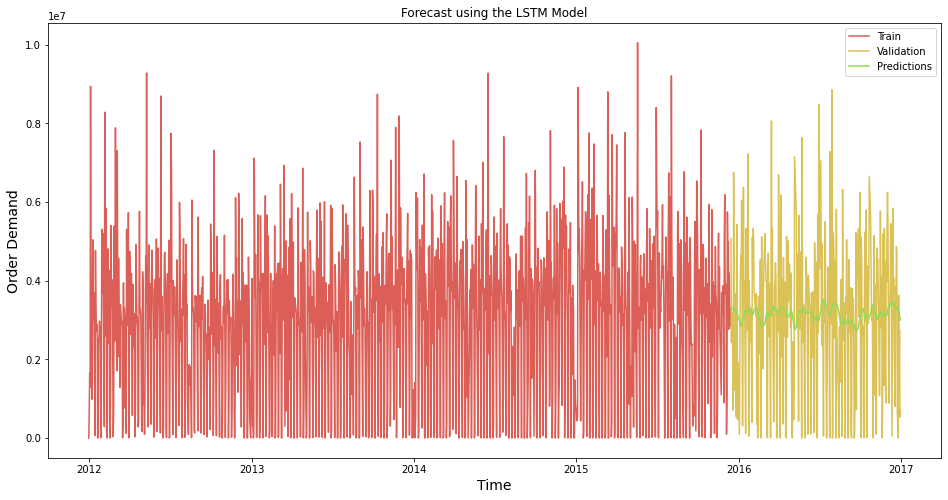

In [52]:
train = df.filter(['Order_Demand'])[: train_close_len]
valid = df.filter(['Order_Demand'])[train_close_len :]
valid["Predictions"] = predictions

plt.figure(figsize = (16, 8))
plt.title('Forecast using the LSTM Model')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Order Demand', fontsize = 14)
plt.plot(df['Date'][:train_close_len], train["Order_Demand"])
plt.plot(df['Date'][train_close_len :], valid[['Order_Demand', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 1)
plt.show()

### Better LSTM

In [53]:
model = Sequential([
    LSTM(512, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)),
    LSTM(256, activation = 'relu', return_sequences = False),
    Dense(128),
    Dense(64),
    Dense(32),
    Dense(1)
])

In [54]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

In [55]:
model.fit(X_train, y_train, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
41/41 [==============================] - 33s 757ms/step - loss: 0.0468 - mae: 0.1761
Epoch 2/20
41/41 [==============================] - 35s 864ms/step - loss: 0.0409 - mae: 0.1632
Epoch 3/20
41/41 [==============================] - 37s 902ms/step - loss: 0.0407 - mae: 0.1637
Epoch 4/20
41/41 [==============================] - 39s 956ms/step - loss: 0.0406 - mae: 0.1629
Epoch 5/20
41/41 [==============================] - 38s 934ms/step - loss: 0.0399 - mae: 0.1618
Epoch 6/20
41/41 [==============================] - 36s 883ms/step - loss: 0.0390 - mae: 0.1597
Epoch 7/20
41/41 [==============================] - 36s 873ms/step - loss: 0.0379 - mae: 0.1560
Epoch 8/20
41/41 [==============================] - 37s 905ms/step - loss: 0.0377 - mae: 0.1585
Epoch 9/20
41/41 [==============================] - 38s 934ms/step - loss: 0.0367 - mae: 0.1571
Epoch 10/20
41/41 [==============================] - 39s 949ms/step - loss: 0.0348 - mae: 0.1495
Epoch 11/20
41/41 [====================

In [56]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 171ms/step


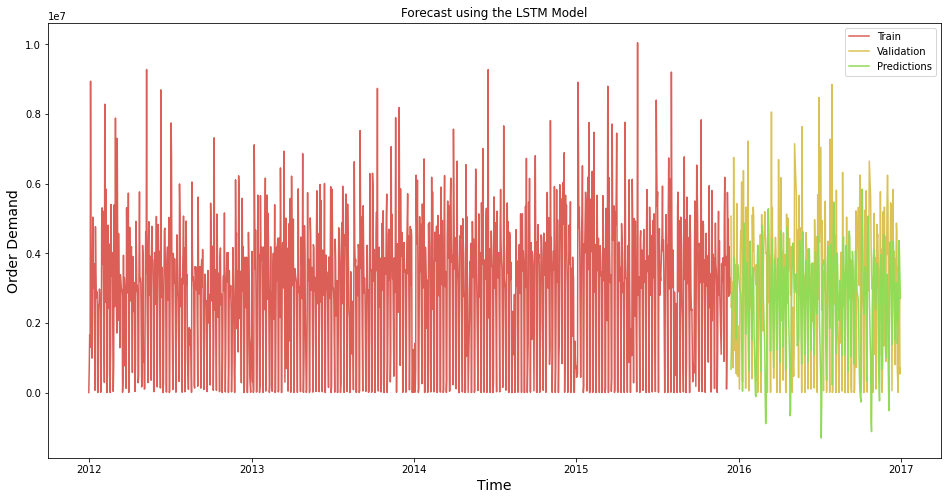

In [57]:
train = df.filter(['Order_Demand'])[: train_close_len]
valid = df.filter(['Order_Demand'])[train_close_len :]
valid["Predictions"] = predictions

plt.figure(figsize = (16, 8))
plt.title('Forecast using the LSTM Model')
plt.xlabel('Time', fontsize = 14)
plt.ylabel('Order Demand', fontsize = 14)
plt.plot(df['Date'][:train_close_len], train["Order_Demand"])
plt.plot(df['Date'][train_close_len :], valid[['Order_Demand', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 1)
plt.show()

### SARIMA Model

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [53]:
data = full_data.copy()

In [54]:
month = data.set_index('Date')
month_avg_sales = month['Order_Demand'].resample('M').mean()
month = None

In [55]:
mod = SARIMAX(month_avg_sales,
             order = (1, 1, 1),
             seasonal_order = (0, 1, 1, 12),
             enforce_stationarity = False,
             enforce_invertibility = False)

results = mod.fit()
results.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

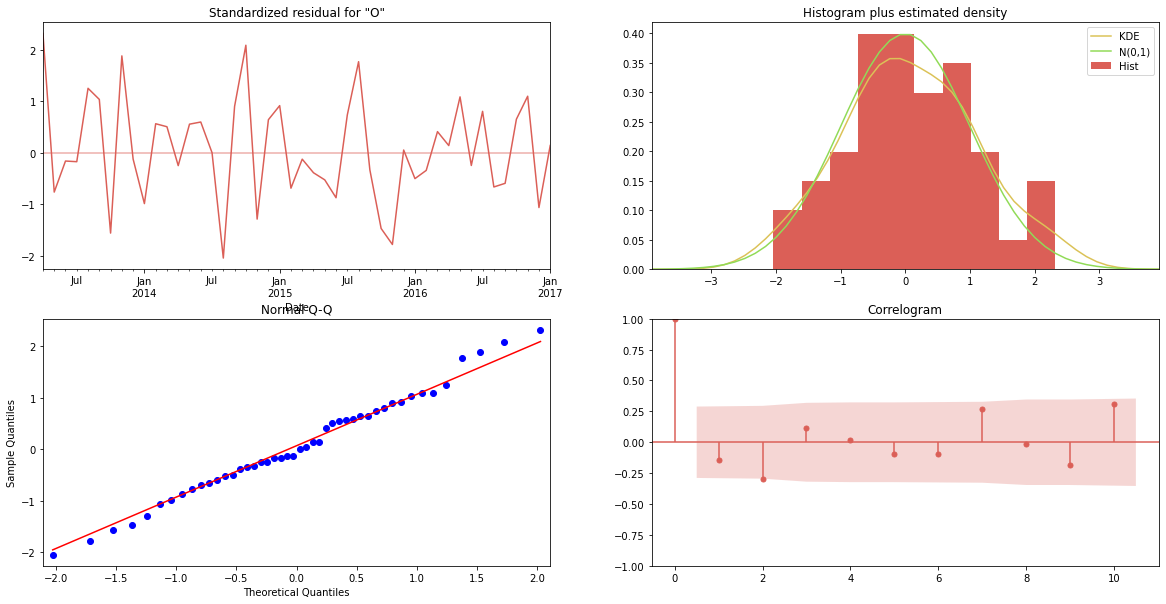

In [56]:
results.plot_diagnostics(figsize = (20, 10))
plt.show()

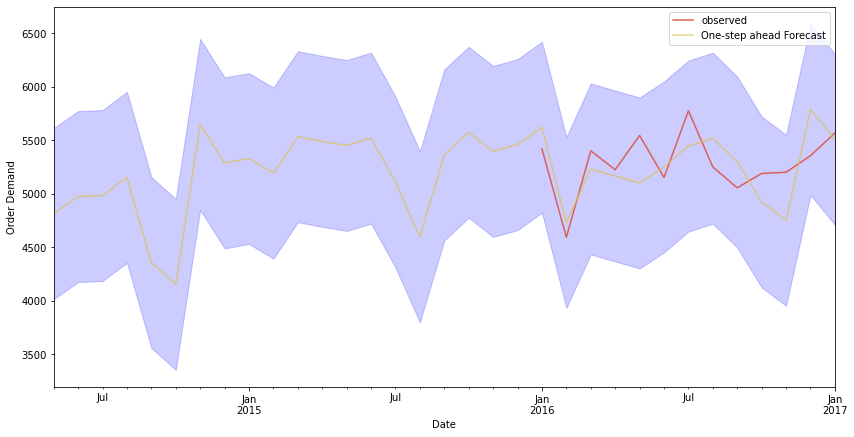

In [57]:
pred = results.get_prediction(start = pd.to_datetime('2014-05-31'), dynamic = False)
pred_ci = pred.conf_int()

ax = month_avg_sales['2016' : ].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color = 'b', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Order Demand')
plt.legend()
plt.show()

In [58]:
y_pred = pred.predicted_mean
y_test = month_avg_sales['2016-01-31':]
error = ((y_pred - y_test) **2).mean()
print('MSE {}'.format(round(error, 2)))
print('RMSE: {}'.format(round(np.sqrt(error), 2)))

MSE 77020.48
RMSE: 277.53


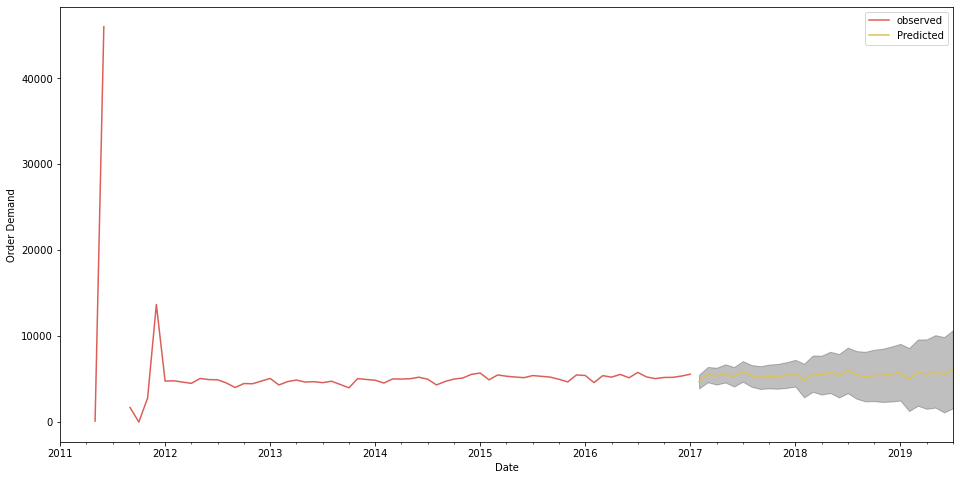

In [59]:
pred_uc = results.get_forecast(steps = 30)
pred_ci = pred_uc.conf_int()

ax = month_avg_sales.plot(label = 'observed', figsize = (16, 8))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicted')

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color = 'k', alpha = .25)

ax.set_xlabel('Date')
ax.set_ylabel('Order Demand')
plt.legend()
plt.show()

### Further ARIMAX

In [151]:
data = full_data[['Date', 'Order_Demand']]
data = data.groupby('Date').agg('sum').reset_index()
data.sort_values(by = ['Date'], inplace = True)
data.head()

Date  Order_Demand
0 2011-01-08           2.0
1 2011-05-31         108.0
2 2011-06-24       92000.0
3 2011-09-02        1250.0
4 2011-09-27          28.0

In [152]:
data.set_index('Date', inplace = True)

In [153]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [154]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


In [155]:
from pmdarima import auto_arima

ADFULLER test to judge if data is stationary or not.

In [156]:
def ad_test(df):
    dftest = adfuller(df, autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Obs for ADF Regression and Critic val calc : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [157]:
ad_test(data['Order_Demand'])

1. ADF :  -7.19682095974956
2. P-value :  2.422491542035771e-10
3. Num of Lags :  22
4. Num of Obs for ADF Regression and Critic val calc :  1706
5. Critical Values : 
	 1% :  -3.434188901924303
	 5% :  -2.8632356597809077
	 10% :  -2.5676727236469037


In [158]:
stepwise_fit = auto_arima(data['Order_Demand'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=54952.087, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55966.120, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55796.767, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55152.075, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55964.120, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54979.352, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55012.187, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=54947.595, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=55011.916, Time=0.62 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=54844.167, Time=1.45 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=54925.010, Time=0.58 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=54658.633, Time=1.00 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=54668.066, Time=0.87 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=54642.576, Time=1.22 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1729
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -27253.825
Date:                Thu, 29 Dec 2022   AIC                          54529.650
Time:                        18:44:30   BIC                          54589.652
Sample:                             0   HQIC                         54551.845
                               - 1729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0424      0.072     -0.586      0.558      -0.184       0.099
ar.L2         -0.7528      0.052    -14.395      0.000      -0.855      -0.650
ar.L3         -0.1865      0.080     -2.341      0.019      -0.343      -0.030
ar.L4         -0.6517      0.040    -16.342      0.000      -0.730      -0.574
ar.L5         -0.2554      0.046     -5.499      0.000      -0.346      -0.164
ma.L1         -0.8026      0.073    -11.066      0.000      -0.945      -0.660
ma.L2          0.4478      0.107      4.203      0.000       0.239       0.657
ma.L3         -0.2856      0.096     -2.985      0.003      -0.473      -0.098
ma.L4          0.2076      0.070      2.951      0.003       0.070       0.346
ma.L5         -0.4234      0.040    -10.494      0.000      -0.502      -0.344
sigma2      3.094e+12   2.69e-15   1.15e+27      0.000    3.09e+12    3.09e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               253.32
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+43. Standard errors may be unstable.
"""

Best fitting ARIMA model has order 5, 1, 5 and no seasonality

In [159]:
train_len = round(data.shape[0] * 0.8)
train_len

train = data.iloc[:train_len]
test = data.iloc[train_len:]

In [160]:
model = ARIMA(train['Order_Demand'], order = (5,1,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                 1383
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21754.787
Date:                Thu, 29 Dec 2022   AIC                          43531.573
Time:                        18:44:33   BIC                          43589.117
Sample:                             0   HQIC                         43553.098
                               - 1383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7037      0.112      6.296      0.000       0.485       0.923
ar.L2         -1.2196      0.071    -17.280      0.000      -1.358      -1.081
ar.L3          0.5760      0.114      5.071      0.000       0.353       0.799
ar.L4         -0.8732      0.044    -19.792      0.000      -0.960      -0.787
ar.L5          0.1329      0.070      1.887      0.059      -0.005       0.271
ma.L1         -1.5476      0.108    -14.328      0.000      -1.759      -1.336
ma.L2          1.5304      0.162      9.461      0.000       1.213       1.847
ma.L3         -1.1689      0.143     -8.167      0.000      -1.449      -0.888
ma.L4          0.6740      0.095      7.058      0.000       0.487       0.861
ma.L5         -0.4124      0.044     -9.341      0.000      -0.499      -0.326
sigma2      2.938e+12   1.11e-13   2.65e+25      0.000    2.94e+12    2.94e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               368.09
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.91
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+41. Standard errors may be unstable.
"""

In [161]:
start = len(train)
end = start + len(test) - 1
predict = model.predict(start = start, end = end, typ = 'levels')
predict.index = data.index[start:end+1] #Ensuring the prediction index is similar to that of the data.
print(predict)

Date
2015-12-10    4.500348e+06
2015-12-11    2.427819e+06
2015-12-13    1.117526e+06
2015-12-14    2.834496e+06
2015-12-15    4.275887e+06
                  ...     
2017-01-03    3.282552e+06
2017-01-04    3.282366e+06
2017-01-05    3.281666e+06
2017-01-06    3.281051e+06
2017-01-09    3.281025e+06
Name: predicted_mean, Length: 346, dtype: float64


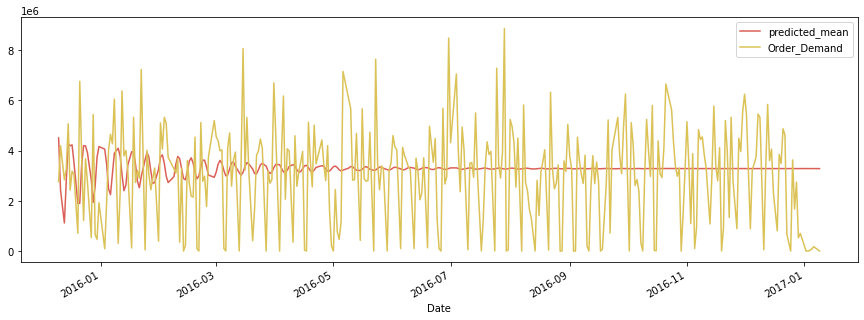

In [166]:
predict.plot(legend = True, figsize = (15, 5))
test['Order_Demand'].plot(legend = True)
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(predict, test['Order_Demand']))
rmse

1972956.602695191

### ARIMA 02

Repeating above with trimmed data

In [146]:
df = full_data[full_data['Year'] != 2017]
df = df[df['Year'] != 2011]

df = df[['Date', 'Order_Demand']]
df = df.groupby('Date').agg('sum').reset_index()
df.sort_values(by = ['Date'], inplace = True)
df.head()

Date  Order_Demand
0 2012-01-01           2.0
1 2012-01-02      680277.0
2 2012-01-03     1645257.0
3 2012-01-04     1295861.0
4 2012-01-05     8941774.0

In [147]:
df.set_index('Date', inplace = True)

In [148]:
ad_test(df['Order_Demand'])

1. ADF :  -8.112010951544654
2. P-value :  1.2187228581190171e-12
3. Num of Lags :  22
4. Num of Obs for ADF Regression and Critic val calc :  1658
5. Critical Values : 
	 1% :  -3.434300212992577
	 5% :  -2.863284793874921
	 10% :  -2.567698886736967


In [168]:
train_len = round(df.shape[0] * 0.8)
train_len

train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [149]:
stepwise_fit = auto_arima(df['Order_Demand'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=53445.497, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=54456.732, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54292.562, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54454.732, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=53468.171, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=53359.756, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=53462.334, Time=0.56 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=53351.185, Time=0.91 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=53137.138, Time=1.36 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=53093.148, Time=2.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1681
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -26486.889
Date:                Thu, 29 Dec 2022   AIC                          52997.778
Time:                        18:43:24   BIC                          53062.897
Sample:                             0   HQIC                         53021.899
                               - 1681                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5511.5230   3016.826     -1.827      0.068   -1.14e+04     401.348
ar.L1         -0.0743      0.072     -1.031      0.302      -0.215       0.067
ar.L2         -0.7416      0.052    -14.341      0.000      -0.843      -0.640
ar.L3         -0.2202      0.079     -2.777      0.005      -0.376      -0.065
ar.L4         -0.6459      0.040    -16.170      0.000      -0.724      -0.568
ar.L5         -0.2749      0.045     -6.103      0.000      -0.363      -0.187
ma.L1         -0.8109      0.071    -11.348      0.000      -0.951      -0.671
ma.L2          0.4069      0.107      3.806      0.000       0.197       0.616
ma.L3         -0.2777      0.096     -2.884      0.004      -0.466      -0.089
ma.L4          0.1736      0.073      2.373      0.018       0.030       0.317
ma.L5         -0.4434      0.041    -10.699      0.000      -0.525      -0.362
sigma2      3.091e+12   2.99e-05   1.03e+17      0.000    3.09e+12    3.09e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               187.35
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.23e+31. Standard errors may be unstable.
"""

In [167]:
model = ARIMA(train['Order_Demand'], order = (5,1,5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Order_Demand   No. Observations:                 1383
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21754.787
Date:                Thu, 29 Dec 2022   AIC                          43531.573
Time:                        18:45:42   BIC                          43589.117
Sample:                             0   HQIC                         43553.098
                               - 1383                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7037      0.112      6.296      0.000       0.485       0.923
ar.L2         -1.2196      0.071    -17.280      0.000      -1.358      -1.081
ar.L3          0.5760      0.114      5.071      0.000       0.353       0.799
ar.L4         -0.8732      0.044    -19.792      0.000      -0.960      -0.787
ar.L5          0.1329      0.070      1.887      0.059      -0.005       0.271
ma.L1         -1.5476      0.108    -14.328      0.000      -1.759      -1.336
ma.L2          1.5304      0.162      9.461      0.000       1.213       1.847
ma.L3         -1.1689      0.143     -8.167      0.000      -1.449      -0.888
ma.L4          0.6740      0.095      7.058      0.000       0.487       0.861
ma.L5         -0.4124      0.044     -9.341      0.000      -0.499      -0.326
sigma2      2.938e+12   1.11e-13   2.65e+25      0.000    2.94e+12    2.94e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               368.09
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             0.91
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.36e+41. Standard errors may be unstable.
"""

In [169]:
train_len

1345

In [170]:
df.shape

(1681, 1)

In [171]:
start = len(train)
end = start + len(test) - 1
predict = model.predict(start = start, end = end, typ = 'levels')
predict.index = df.index[start:end+1] #Ensuring the prediction index is similar to that of the data.
print(predict)

Date
2015-12-15    4.398538e+06
2015-12-16    2.089570e+06
2015-12-17    1.455746e+06
2015-12-18    3.735937e+06
2015-12-20    4.299830e+06
                  ...     
2016-12-26    3.280630e+06
2016-12-27    3.282846e+06
2016-12-28    3.284048e+06
2016-12-29    3.283290e+06
2016-12-30    3.281280e+06
Name: predicted_mean, Length: 336, dtype: float64


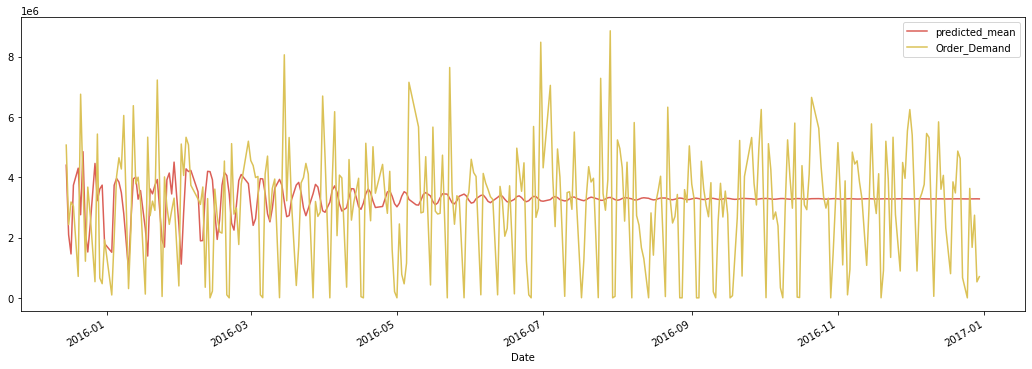

In [172]:
predict.plot(legend = True, figsize = (18, 6))
test['Order_Demand'].plot(legend = True)
plt.show()

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(predict, test['Order_Demand']))
rmse

1908824.4973568588

### Prophet

In [105]:
#Prediction using prophet

In [ ]:
!pip install prophet

In [ ]:
!pip install --upgrade plotly

In [114]:
import prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [115]:
help(prophet)

Help on package prophet:

NAME
    prophet

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the BSD-style license found in the
    # LICENSE file in the root directory of this source tree. An additional grant
    # of patent rights can be found in the PATENTS file in the same directory.

PACKAGE CONTENTS
    __version__
    diagnostics
    forecaster
    hdays
    make_holidays
    models
    plot
    serialize
    tests (package)
    utilities

DATA
    about = {'__author__': 'Sean J. Taylor <sjtz@pm.me>, Ben Letham <bleth...
    f = <_io.TextIOWrapper name='C:\\Users\\amogungb\\An...phet\\__version...
    here = WindowsPath('C:/Users/amogungb/Anaconda3/Lib/site-packages/prop...

VERSION
    1.1.1

FILE
    c:\users\amogungb\anaconda3\lib\site-packages\prophet\__init__.py




In [120]:
df = df.reset_index().rename(columns = {"Date" : "ds", "Order_Demand" : "y"})
df['ds'] = pd.to_datetime(df['ds'])

<AxesSubplot:xlabel='ds'>

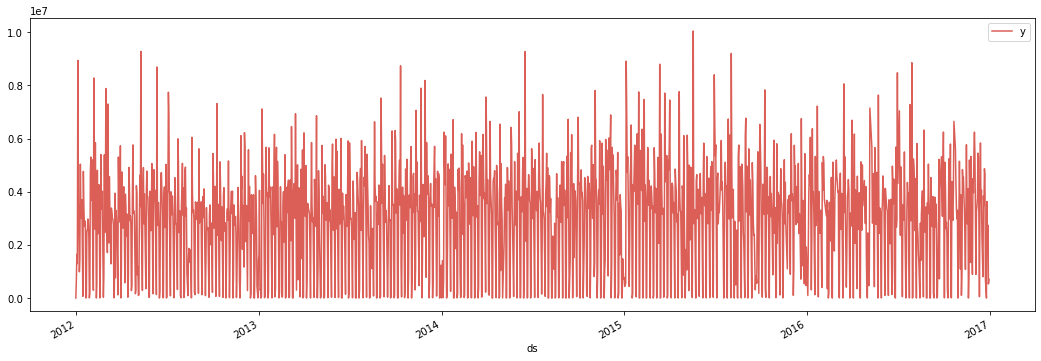

In [121]:
df.plot(x = 'ds', y = 'y', figsize = (18, 6))

In [122]:
train_len = round(df.shape[0] * 0.8)

train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [123]:
m = prophet.Prophet()

In [124]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [125]:
future = m.make_future_dataframe(periods = len(test))

In [126]:
forecast = m.predict(future)

In [127]:
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
1676 2016-11-10  3.145840e+06  2.549919e+06  5.497322e+06  3.136626e+06   
1677 2016-11-11  3.146042e+06  2.427014e+06  5.409706e+06  3.136767e+06   
1678 2016-11-12  3.146243e+06 -1.219702e+06  1.789814e+06  3.136908e+06   
1679 2016-11-13  3.146444e+06 -1.003554e+06  2.068623e+06  3.137053e+06   
1680 2016-11-14  3.146645e+06  2.845998e+06  5.915942e+06  3.137200e+06   

       trend_upper  additive_terms  additive_terms_lower  \
1676  3.154154e+06    8.845606e+05          8.845606e+05   
1677  3.154404e+06    7.875165e+05          7.875165e+05   
1678  3.154639e+06   -2.886987e+06         -2.886987e+06   
1679  3.154876e+06   -2.609830e+06         -2.609830e+06   
1680  3.155125e+06    1.226142e+06          1.226142e+06   

      additive_terms_upper        weekly  weekly_lower  weekly_upper  \
1676          8.845606e+05  9.940097e+05  9.940097e+05  9.940097e+05   
1677          7.875165e+05  8.800461e+05  8.800461e+05  8.800461e+05   
1678         -2.886987e+06 -2.813697e+06 -2.813697e+06 -2.813697e+06   
1679         -2.609830e+06 -2.557913e+06 -2.557913e+06 -2.557913e+06   
1680          1.226142e+06  1.254756e+06  1.254756e+06  1.254756e+06   

             yearly   yearly_lower   yearly_upper  multiplicative_terms  \
1676 -109449.127043 -109449.127043 -109449.127043                   0.0   
1677  -92529.573289  -92529.573289  -92529.573289                   0.0   
1678  -73289.668776  -73289.668776  -73289.668776                   0.0   
1679  -51917.320015  -51917.320015  -51917.320015                   0.0   
1680  -28613.914708  -28613.914708  -28613.914708                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
1676                         0.0                         0.0  4.030401e+06  
1677                         0.0                         0.0  3.933558e+06  
1678                         0.0                         0.0  2.592562e+05  
1679                         0.0                         0.0  5.366141e+05  
1680                         0.0                         0.0  4.372788e+06

In [130]:
plot_plotly(m, forecast)

In [132]:
plot_components_plotly(m, forecast)

In [133]:
from statsmodels.tools.eval_measures import rmse

In [137]:
predictions = forecast.iloc[train_len:]['yhat']

In [139]:
print("Root Mean Squared Error between actual and predictecd values: ", rmse(predictions, test['y']))
print("Mean Value of Test Dataset: ", test['y'].mean())

Root Mean Squared Error between actual and predictecd values:  2543680.08804114
Mean Value of Test Dataset:  3074991.3958333335
